# **CMPSC497 Fall 2022 Programming Assignment 1.**

Notebook and report by: Anish Phule

# Task 1: Data Analysis

In this section we examine the data and get a preliminary analysis of the data at hand.

In [2]:
#Importing various libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency
import operator
from math import ceil 

In [3]:
#This makes all figures appear bigger in the notebook
plt.rcParams['figure.figsize'] = [10, 5]

In [5]:
#Reading the input csv file
read_file = pd.read_csv (r'/content/credit cards-2022-post.csv')
#read_file.to_excel (r'/Users/anishphule/Downloads/credit_cards.xlsx', index = None, header=True)

## Task 1(a): Unclear or Questionable attribute values:
There are a few questionable/unclear values in the dataset. These values belong to attributes that are supposed to be within a certain range, but exceed them. For example, in the 'Education' attribute, the values are supposed to be [1,2,3,4] but some times they exceed the limits. For some of the Pay_n attributes, the values are 0, -1, and -2, which can make things very confusing, and they actually give us the same information. -1 represents that no amount is due, but 0 also denotes the same(amount is due for 0 months), and -2 was a questionable value, which upon further examination seemed to arrive in cases where there was a possible refund from the company or the person paid more than the actual bill. In any of these cases, no amount is ctually due, so it makes sense to make all three 0.

In case of the Education and Marriage attributes, if any value was out of bounds, I equated it to the nearest possible value. In case of Pay_n, any values less than 0 were equated to 0.

In [6]:
for index, row in read_file.iterrows():
    if (row['EDUCATION'] < 1):
        row['EDUCATION'] = 1
    elif (row['EDUCATION'] >4):
        row['EDUCATION'] = 4
    if (row['MARRIAGE'] < 1):
        row['MARRIAGE'] = 1

In [7]:
pay_list = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
for index, row in read_file.iterrows():
    for i in range(len(pay_list)):
        if (row[pay_list[i]] < 0):
            row[pay_list[i]] = 0

## Task 1(b): Missing Values:

There also are instances of values completely missing. While questionable values are result of human error or error in data collection, missing values are just loss of data. In our case, Some data entries have all BILL_AMT values 0. This cannot be true, since credit card usage has to have some bill amount. There don't seem to be a lot of these, hence we can safely remove any such data entries, and they won't be of any consequence to our result anyways.

In [8]:
#Removing data points with missing values.
bill_amt = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
for index, row in read_file.iterrows():
    bill_sum = 0
    for i in range(6):
        bill_sum += row[bill_amt[i]] #we sum the bill amounts to check if they are 0 or not
    if bill_sum == 0:
        read_file = read_file.drop(labels=index, axis=0)#we remove any rows that sum up to 0
        
read_file = read_file.reset_index()
#read_file.to_excel (r'/Users/anishphule/Downloads/credit_cards.xlsx', index = None, header=True)

## Task 1(c): Summary Satistics:

The following section calculates and displays various summary statistics for the target class 'DEFAULT'. It also dislays the distribution plot of the various class labels in the same.

Since the class labels are either 0 or 1, the lesser mean value would indicate there is a class imbalance in the dataset. The frequency statistic, mode and the bar chart all indicate the same. The class label 0 is in much more majority than the class label 1, meaning most of the customers are not defaulters.

In [9]:
#Describe various kinds of summary statistics for the default class
default_class = read_file['default payment next month']
print('Summary Statistics of DEFAULT class')
print(default_class.describe(include='all'))
print('mode ', default_class.value_counts().idxmax())
print('Frequency \n', default_class.value_counts())

Summary Statistics of DEFAULT class
count    23291.000000
mean         0.218625
std          0.413323
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: default payment next month, dtype: float64
mode  0
Frequency 
 0    18199
1     5092
Name: default payment next month, dtype: int64


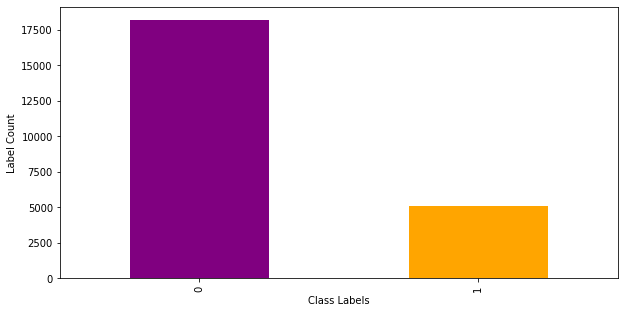

In [10]:
#Plotting the default class distribution with Matplotlib
default_class.value_counts().plot(kind="bar", color=['purple', 'orange'])
plt.xlabel('Class Labels')
plt.ylabel('Label Count')
plt.show()

# Task 2:

## Task 2(a): Summary Statistics for BILL_AMTs

The follwing block shows the summary statistics for each of the BILL_AMT attributes

In [11]:
#Summary statistics of all the BILL_AMTs
bill_amt = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
for i in range(6):
    current_bill = read_file[bill_amt[i]]
    print('Summary Statistics of', bill_amt[i])
    print(current_bill.describe(include='all'))
    print('mode ', current_bill.value_counts().idxmax())
    print('Frequency \n', current_bill.value_counts(),'\n')

Summary Statistics of BILL_AMT1
count     23291.000000
mean      52616.001116
std       73512.658400
min     -165580.000000
25%        4533.000000
50%       24464.000000
75%       69395.000000
max      746814.000000
Name: BILL_AMT1, dtype: float64
mode  0
Frequency 
 0         919
390       196
780        63
326        62
316        53
         ... 
76917       1
20936       1
321281      1
102505      1
156449      1
Name: BILL_AMT1, Length: 18697, dtype: int64 

Summary Statistics of BILL_AMT2
count     23291.000000
mean      50627.803615
std       71454.291610
min      -69777.000000
25%        3904.500000
50%       23255.000000
75%       66347.000000
max      743970.000000
Name: BILL_AMT2, dtype: float64
mode  0
Frequency 
 0         1287
390        190
780         65
326         63
316         62
          ... 
2638         1
30138        1
91782        1
17816        1
162377       1
Name: BILL_AMT2, Length: 18344, dtype: int64 

Summary Statistics of BILL_AMT3
count    2.329100e+

## Task 2(b): Box Plot of BILL_AMT attributes

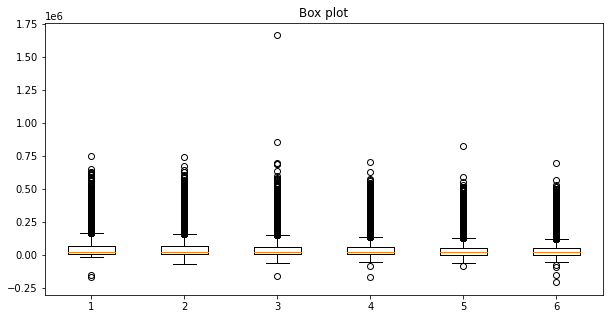

In [12]:
bill_amt = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
#current_bill = read_file[bill_amt[i]]
plt.boxplot([read_file[bill_amt[0]],read_file[bill_amt[1]],read_file[bill_amt[2]],
             read_file[bill_amt[3]],read_file[bill_amt[4]],read_file[bill_amt[5]]])
plt.title('Box plot')
plt.show()  

## Task 2(c): Findings from 2a and 2b

From the above two tasks, We can summarize that ignoring the outliers, most of the values in the amounts lie in the (-1.5e6 to 50,000) range. BILL_AMT1 has relative the most spread(in the 25th to 75th percentile range), while BILL_AMT6 has the least spread. The most frequent value remains to be 0, meaning most of the customers for a certain period have 0 bill value. 

# Task 3

## Task 3(a): Characteristics and Differences between Chi-Square and Mutual Information.

The following points characterise Chi-Square and Mutual information as well point our some of their differences:

1.   Chi-Square statistic summarizes the 'difference' between various classes and the expected frequencies, whereas Mutual Information summrizes the 'dependence' between an attributes.
2.   The Chi-Square uses Pearson's Chi-Squared Test, whereas Mutual Information uses Kullback–Leibler divergence.
3. Chi-Square test pertains to attributes that are Categorical in nature, while Mutual Information pertains to attributes that are numerical in Nature.



## Task 3(b): With Respect to our Dataset.

We need to employ Chi-Square and Mutual information on our dataset for feature Selection. However, we cannot just apply it on all features and expect to do a proper feature selection. This is beacuse not all attributes are of the same nature and not all attributes are suited for either of the methods. Chi-Squared test takes in only categorical attributes, while Mutual Information takes in only Numerical Attributes. Our dataset too contains these kinds. For example, the SEX and EDUCATION attributes are categorical, since they represent other categories, while attributes like BILL_AMTs are numerical and their given values are to be considered. Hence, we first need to segregate these attributes, and then aplly the tests on the respective lists.

In [13]:
#Importing mutual info and chi square library
from sklearn.feature_selection import mutual_info_classif, chi2

## Task 3(c): Employing Chi-Square Test and Mutual Information

In this section, we create two lists, Categorical and Numerical. These contain the attribute names of respective kinds of attributes. We them employ respective tests and create a ranked list for each of them. We also display the top 3 and bottom 3 ranked attributes after each employment of test.

In [14]:
#Creating a list of categorical attributes
categorical = ['SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
X = read_file[categorical]
Y = read_file['default payment next month']
#Applying chi-sqaured test and displaying in descending order
chi_score2 = chi2(X,Y)
chi_score2 = pd.Series(chi_score2[0], index = X.columns)
print(chi_score2.sort_values(ascending = False))

PAY_0        6396.578170
PAY_2        5434.451564
PAY_3        4177.859337
PAY_5        4104.266719
PAY_4        4035.664064
PAY_6        3429.280820
EDUCATION      10.363865
SEX             4.528088
MARRIAGE        1.552130
dtype: float64


In [15]:
#We display the top 3 and Bottom 3 features
chi_score2 = chi_score2.sort_values(ascending = False)
print('3 features with highest Chi Square scores:\n',chi_score2.nlargest(n=3, keep='first'),'\n')
print('3 features with lowest Chi Square scores:\n',chi_score2.nsmallest(n=3, keep='first'))

3 features with highest Chi Square scores:
 PAY_0    6396.578170
PAY_2    5434.451564
PAY_3    4177.859337
dtype: float64 

3 features with lowest Chi Square scores:
 MARRIAGE      1.552130
SEX           4.528088
EDUCATION    10.363865
dtype: float64


In [16]:
#Creating a list of numerical attributes
Numerical = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4',
             'BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4',
             'PAY_AMT5','PAY_AMT6']
X = read_file[Numerical]
Y = read_file['default payment next month']
#Applying Mutual Information and displaying in descending order
result = mutual_info_classif(X, Y, random_state = 100)
result = pd.Series(result,index = X.columns)
print(result.sort_values(ascending = False))
print('\n')

PAY_AMT1     0.024063
LIMIT_BAL    0.017952
PAY_AMT2     0.015880
PAY_AMT3     0.014342
PAY_AMT6     0.012941
PAY_AMT4     0.012415
PAY_AMT5     0.010674
BILL_AMT2    0.008620
BILL_AMT5    0.008314
BILL_AMT1    0.008071
BILL_AMT3    0.005633
BILL_AMT4    0.004929
BILL_AMT6    0.003412
AGE          0.002878
dtype: float64




In [17]:
#Displaying the top 3 and Bottom 3 features.
result = result.sort_values(ascending = False)
print('3 features with highest Mutual Info scores:\n',result.nlargest(n=3, keep='first'),'\n')
print('3 features with lowest Mutual Info scores:\n',result.nsmallest(n=3, keep='first'))

3 features with highest Mutual Info scores:
 PAY_AMT1     0.024063
LIMIT_BAL    0.017952
PAY_AMT2     0.015880
dtype: float64 

3 features with lowest Mutual Info scores:
 AGE          0.002878
BILL_AMT6    0.003412
BILL_AMT4    0.004929
dtype: float64


## Task 3(d): Plotting distributions

We now plot distributions of:
1. the highest ranked three categorical
features
2. the lowest ranked three categorical features
3. the highest
ranked three numerical features
4. the lowest ranked three
numerical features

Description of the distribution and the ranked lists is at the end of all the plots.

### Lowest Ranked Categorical Features 
are Marriage, Sex and Education


In [18]:
#We first locate and count the number of instances where the default value is either 0 or 1.
default_0 = (read_file.loc[read_file['default payment next month']==0, ['MARRIAGE']]).value_counts().reset_index(name='Counts')
default_0 = default_0.sort_values(by = 'MARRIAGE')
print(default_0)
default_1 = (read_file.loc[read_file['default payment next month']==1, ['MARRIAGE']]).value_counts().reset_index(name='Counts')
default_1 = default_1.sort_values(by = 'MARRIAGE')
print(default_1)
default_0n1 = default_1
default_0n1['Counts'] = default_0['Counts'] + default_1['Counts']
default_0n1 = default_0n1.sort_values(by = 'MARRIAGE')
print(default_0n1)

   MARRIAGE  Counts
1         1    8193
0         2    9821
2         3     185
   MARRIAGE  Counts
1         1    2431
0         2    2596
2         3      65
   MARRIAGE  Counts
1         1   10624
0         2   12417
2         3     250


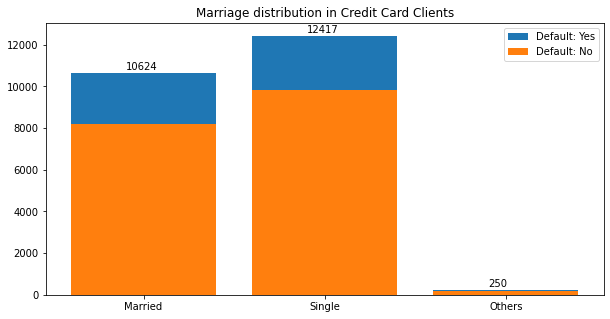

In [19]:
#We then plot a stacjed bar chart. Please make a note of the legend since it can change w.r.t the plot.
bars = plt.bar(range(len(default_0n1.index)), default_0n1['Counts'], label = 'Default: Yes')
plt.bar(range(len(default_0.index)), default_0['Counts'], label = 'Default: No')
plt.legend(loc='best')
plt.title('Marriage distribution in Credit Card Clients')
plt.xticks([0,1,2],['Married','Single','Others'])
for i in bars:
    H = i.get_height()
    plt.text(i.get_x()+0.3, H+150, H)

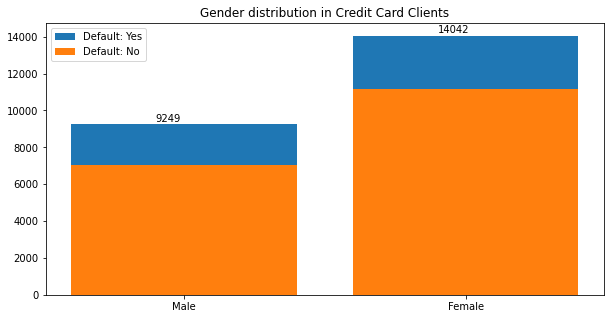

In [20]:
#We repeat the above for all the stacked plots concerned
default_0 = (read_file.loc[read_file['default payment next month']==0, ['SEX']]).value_counts().reset_index(name='Counts')
default_0 = default_0.sort_values(by = 'SEX')
default_1 = (read_file.loc[read_file['default payment next month']==1, ['SEX']]).value_counts().reset_index(name='Counts')
default_1 = default_1.sort_index()
default_0n1 = default_1
default_0n1['Counts'] = default_0['Counts'] + default_1['Counts']
default_0n1 = default_0n1.sort_values(by = 'SEX')

bars = plt.bar(range(len(default_0n1.index)), default_0n1['Counts'], label = 'Default: Yes')
plt.bar(range(len(default_0.index)), default_0['Counts'], label = 'Default: No')
plt.legend(loc='best')
plt.title('Gender distribution in Credit Card Clients')
plt.xticks([0,1],['Male', 'Female'])
for i in bars:
    H = i.get_height()
    plt.text(i.get_x()+0.3, H+150, H)

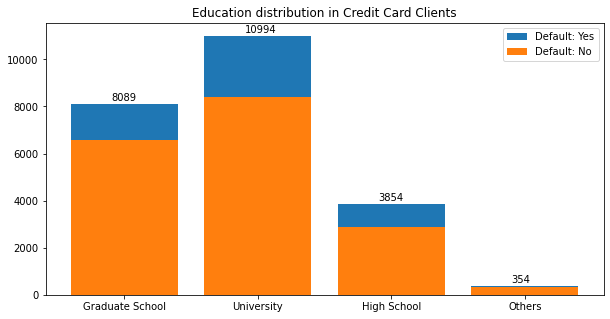

In [ ]:
default_0 = (read_file.loc[read_file['default payment next month']==0, ['EDUCATION']]).value_counts().reset_index(name='Counts')
default_0 = default_0.sort_values(by = 'EDUCATION')
default_1 = (read_file.loc[read_file['default payment next month']==1, ['EDUCATION']]).value_counts().reset_index(name='Counts')
default_1 = default_1.sort_index()
default_0n1 = default_1
default_0n1['Counts'] = default_0['Counts'] + default_1['Counts']
default_0n1 = default_0n1.sort_values(by = 'EDUCATION')

bars = plt.bar(range(len(default_0n1.index)), default_0n1['Counts'], label = 'Default: Yes')
plt.bar(range(len(default_0.index)), default_0['Counts'], label = 'Default: No')
plt.legend(loc='best')
plt.title('Education distribution in Credit Card Clients')
plt.xticks([0,1,2,3],['Graduate School','University','High School','Others'])
for i in bars:
    H = i.get_height()
    plt.text(i.get_x()+0.3, H+150, H)

### Highest Ranked Categorical Features 
are PAY_0, PAY_2, PAY_3

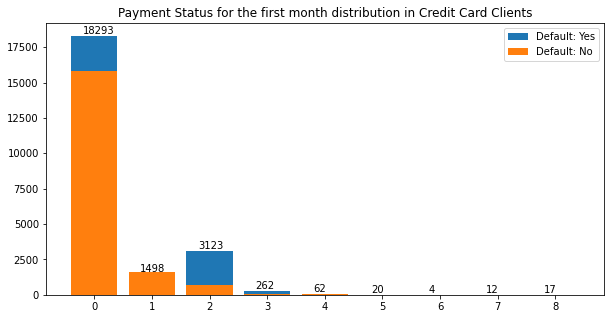

In [ ]:
default_0 = (read_file.loc[read_file['default payment next month']==0, ['PAY_0']]).value_counts().reset_index(name='Counts')
default_0 = default_0.sort_values(by = 'PAY_0')
default_1 = (read_file.loc[read_file['default payment next month']==1, ['PAY_0']]).value_counts().reset_index(name='Counts')
default_1 = default_1.sort_index()
default_0n1 = default_1
default_0n1['Counts'] = default_0['Counts'] + default_1['Counts']
default_0n1 = default_0n1.sort_values(by = 'PAY_0')

bars = plt.bar(range(len(default_0n1.index)), default_0n1['Counts'], label = 'Default: Yes')
plt.bar(range(len(default_0.index)), default_0['Counts'], label = 'Default: No')
plt.legend(loc='best')
plt.title('Payment Status for the first month distribution in Credit Card Clients')
plt.xticks([0,1,2,3,4,5,6,7,8],[0,1,2,3,4,5,6,7,8])
for i in bars:
    H = i.get_height()
    plt.text(i.get_x()+0.2, H+150, H)

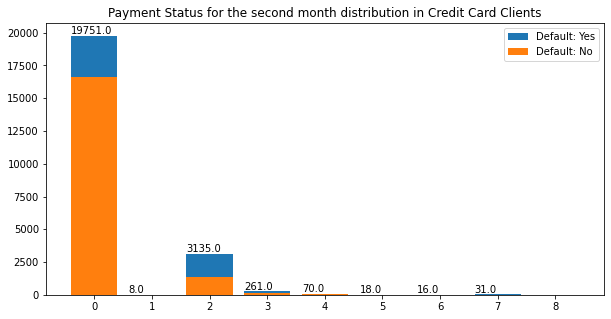

In [ ]:
default_0 = (read_file.loc[read_file['default payment next month']==0, ['PAY_2']]).value_counts().reset_index(name='Counts')
default_0 = default_0.sort_values(by = 'PAY_2')
default_1 = (read_file.loc[read_file['default payment next month']==1, ['PAY_2']]).value_counts().reset_index(name='Counts')
default_1 = default_1.sort_index()
default_0n1 = default_1
default_0n1['Counts'] = default_0['Counts'] + default_1['Counts']
default_0n1 = default_0n1.sort_values(by = 'PAY_2')

bars = plt.bar(range(len(default_0n1.index)), default_0n1['Counts'], label = 'Default: Yes')
plt.bar(range(len(default_0.index)), default_0['Counts'], label = 'Default: No')
plt.legend(loc='best')
plt.title('Payment Status for the second month distribution in Credit Card Clients')
plt.xticks([0,1,2,3,4,5,6,7,8],[0,1,2,3,4,5,6,7,8])
for i in bars:
    H = i.get_height()
    plt.text(i.get_x(), H+150, H)

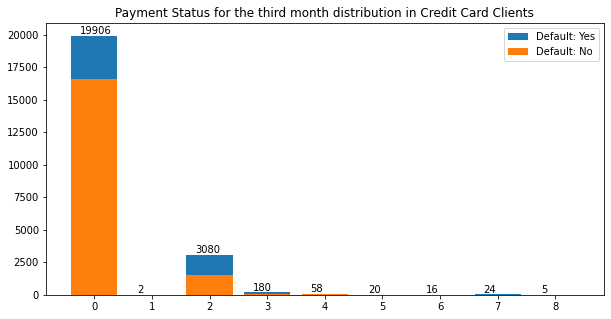

In [ ]:
default_0 = (read_file.loc[read_file['default payment next month']==0, ['PAY_3']]).value_counts().reset_index(name='Counts')
default_0 = default_0.sort_values(by = 'PAY_3')
default_1 = (read_file.loc[read_file['default payment next month']==1, ['PAY_3']]).value_counts().reset_index(name='Counts')
default_1 = default_1.sort_index()
default_0n1 = default_1
default_0n1['Counts'] = default_0['Counts'] + default_1['Counts']
default_0n1 = default_0n1.sort_values(by = 'PAY_3')

bars = plt.bar(range(len(default_0n1.index)), default_0n1['Counts'], label = 'Default: Yes')
plt.bar(range(len(default_0.index)), default_0['Counts'], label = 'Default: No')
plt.legend(loc='best')
plt.title('Payment Status for the third month distribution in Credit Card Clients')
plt.xticks([0,1,2,3,4,5,6,7,8],[0,1,2,3,4,5,6,7,8])
for i in bars:
    H = i.get_height()
    plt.text(i.get_x()+0.15, H+150, H)

### Lowest Ranked Numerical Features 
are AGE, BILL_AMT4 and BILL_AMT6

In [ ]:
#Since the values are numerical, we need to group them in bins.
default_0 = (read_file.loc[read_file['default payment next month']==0, ['AGE']]).value_counts().reset_index(name='Counts')
default_0 = default_0.sort_values(by = 'AGE')
df_0 = default_0.groupby(pd.cut(default_0['AGE'], np.arange(20, 80, 5), labels=False)).sum() #Grouping in bins
default_1 = (read_file.loc[read_file['default payment next month']==1, ['AGE']]).value_counts().reset_index(name='Counts')
default_1 = default_1.sort_values(by = 'AGE')
df_1 = default_1.groupby(pd.cut(default_0['AGE'], np.arange(20, 80, 5), labels=False)).sum() #Grouping in bins

new_index = []
for k in range(11):
    new_index.insert(k, 5*k + 22.5)

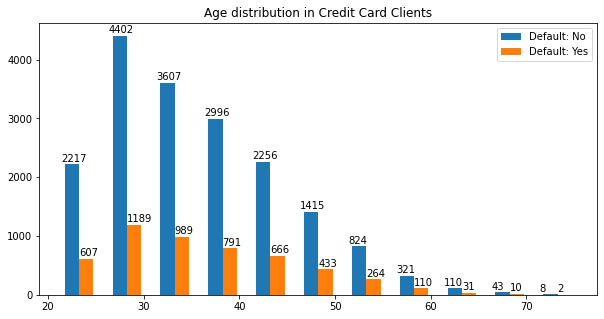

In [ ]:
bar_0 = plt.bar(new_index, df_0['Counts'], width=1.5, label = 'Default: No')
bar_1 = plt.bar([x+1.5 for x in new_index], df_1['Counts'],width=1.5, label = 'Default: Yes')
plt.title('Age distribution in Credit Card Clients')
plt.legend(loc='best')
for i in bar_0:
    H = i.get_height()
    plt.text(i.get_x()-0.4, H+50, H)
for i in bar_1:
    H = i.get_height()
    plt.text(i.get_x(), H+50, H)

([<matplotlib.axis.XTick at 0x7fb89c4b6950>,
 [Text(0, 0, '-130142'),
  Text(0, 0, '-50427'),
  Text(0, 0, '29288'),
  Text(0, 0, '109003'),
  Text(0, 0, '188718'),
  Text(0, 0, '268433'),
  Text(0, 0, '348148'),
  Text(0, 0, '427863'),
  Text(0, 0, '507578'),
  Text(0, 0, '587293')])

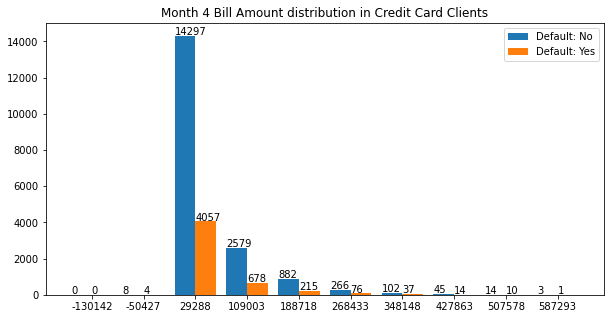

In [ ]:
#The process is same for all the following charts
max_val = read_file['BILL_AMT4'].max()
min_val = read_file['BILL_AMT4'].min()
intervals = ceil((max_val - min_val)/11)
df_count0 = read_file.groupby('BILL_AMT4')['default payment next month'].apply(lambda x: (x==0).sum()).reset_index(name='count')
df_count1 = read_file.groupby('BILL_AMT4')['default payment next month'].apply(lambda x: (x==1).sum()).reset_index(name='count')
df_0 = df_count0.groupby(pd.cut(df_count0['BILL_AMT4'], np.arange(min_val, max_val, intervals))).sum()
df_1 = df_count1.groupby(pd.cut(df_count1['BILL_AMT4'], np.arange(min_val, max_val, intervals))).sum()

new_index = [0,1,2,3,4,5,6,7,8,9]
index_tick = []
for i in range(len(df_0)):
    index_tick.insert(i, ceil(intervals*i + min_val + intervals/2))

width=0.4    
bar_0 = plt.bar([x-width/2 for x in new_index], df_0['count'], width=width, label = 'Default: No')
bar_1 = plt.bar([x+width/2 for x in new_index], df_1['count'],width=width, label = 'Default: Yes')
plt.title('Month 4 Bill Amount distribution in Credit Card Clients')
plt.legend(loc='best')
for i in bar_0:
    H = i.get_height()
    plt.text(i.get_x(), H+50, H)
for i in bar_1:
    H = i.get_height()
    plt.text(i.get_x(), H+50, H)
plt.xticks([0,1,2,3,4,5,6,7,8,9],index_tick)

([<matplotlib.axis.XTick at 0x7fb89c3a3290>,
 [Text(0, 0, '-167733'),
  Text(0, 0, '-85097'),
  Text(0, 0, '-2461'),
  Text(0, 0, '80175'),
  Text(0, 0, '162811'),
  Text(0, 0, '245447'),
  Text(0, 0, '328083'),
  Text(0, 0, '410719'),
  Text(0, 0, '493355'),
  Text(0, 0, '575991')])

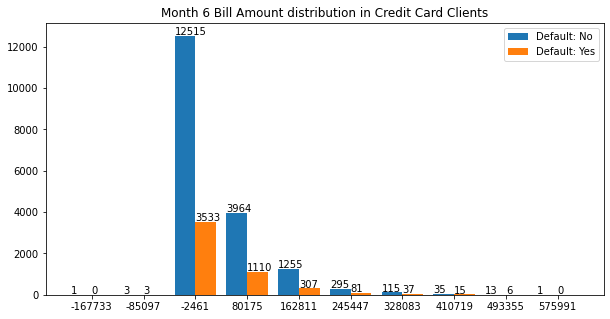

In [ ]:
max_val = read_file['BILL_AMT6'].max()
min_val = read_file['BILL_AMT6'].min()
intervals = ceil((max_val - min_val)/11)
df_count0 = read_file.groupby('BILL_AMT6')['default payment next month'].apply(lambda x: (x==0).sum()).reset_index(name='count')
df_count1 = read_file.groupby('BILL_AMT6')['default payment next month'].apply(lambda x: (x==1).sum()).reset_index(name='count')
df_0 = df_count0.groupby(pd.cut(df_count0['BILL_AMT6'], np.arange(min_val, max_val, intervals))).sum()
df_1 = df_count1.groupby(pd.cut(df_count1['BILL_AMT6'], np.arange(min_val, max_val, intervals))).sum()

new_index = [0,1,2,3,4,5,6,7,8,9]
index_tick = []
for i in range(len(df_0)):
    index_tick.insert(i, ceil(intervals*i + min_val + intervals/2))

width=0.4    
bar_0 = plt.bar([x-width/2 for x in new_index], df_0['count'], width=width, label = 'Default: No')
bar_1 = plt.bar([x+width/2 for x in new_index], df_1['count'],width=width, label = 'Default: Yes')
plt.title('Month 6 Bill Amount distribution in Credit Card Clients')
plt.legend(loc='best')
for i in bar_0:
    H = i.get_height()
    plt.text(i.get_x(), H+50, H)
for i in bar_1:
    H = i.get_height()
    plt.text(i.get_x(), H+50, H)
plt.xticks([0,1,2,3,4,5,6,7,8,9],index_tick)

### Highest Ranked Numerical Features 
are PAY_AMT1, LIMIT_BAL and PAY_AMT2

([<matplotlib.axis.XTick at 0x7fb89c4d8910>,
 [Text(0, 0, '39707'),
  Text(0, 0, '119121'),
  Text(0, 0, '198535'),
  Text(0, 0, '277949'),
  Text(0, 0, '357363'),
  Text(0, 0, '436777'),
  Text(0, 0, '516191'),
  Text(0, 0, '595605'),
  Text(0, 0, '675019'),
  Text(0, 0, '754433')])

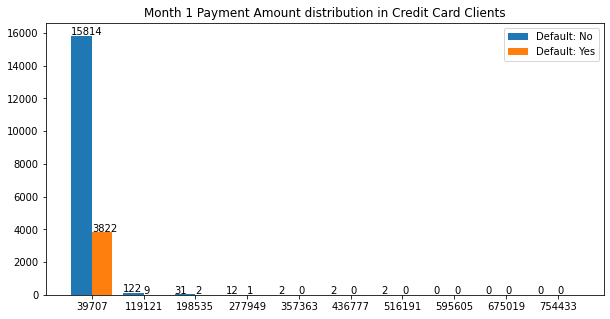

In [ ]:
max_val = read_file['PAY_AMT1'].max()
min_val = read_file['PAY_AMT1'].min()
intervals = ceil((max_val - min_val)/11)
df_count0 = read_file.groupby('PAY_AMT1')['default payment next month'].apply(lambda x: (x==0).sum()).reset_index(name='count')
df_count1 = read_file.groupby('PAY_AMT1')['default payment next month'].apply(lambda x: (x==1).sum()).reset_index(name='count')
df_0 = df_count0.groupby(pd.cut(df_count0['PAY_AMT1'], np.arange(min_val, max_val, intervals))).sum()
df_1 = df_count1.groupby(pd.cut(df_count1['PAY_AMT1'], np.arange(min_val, max_val, intervals))).sum()

new_index = [0,1,2,3,4,5,6,7,8,9]
index_tick = []
for i in range(len(df_0)):
    index_tick.insert(i, ceil(intervals*i + min_val + intervals/2))

width=0.4    
bar_0 = plt.bar([x-width/2 for x in new_index], df_0['count'], width=width, label = 'Default: No')
bar_1 = plt.bar([x+width/2 for x in new_index], df_1['count'],width=width, label = 'Default: Yes')
plt.title('Month 1 Payment Amount distribution in Credit Card Clients')
plt.legend(loc='best')
for i in bar_0:
    H = i.get_height()
    plt.text(i.get_x(), H+50, H)
for i in bar_1:
    H = i.get_height()
    plt.text(i.get_x(), H+50, H)
plt.xticks([0,1,2,3,4,5,6,7,8,9],index_tick)

([<matplotlib.axis.XTick at 0x7fb89c718390>,
 [Text(0, 0, '76558'),
  Text(0, 0, '229673'),
  Text(0, 0, '382788'),
  Text(0, 0, '535903'),
  Text(0, 0, '689018'),
  Text(0, 0, '842133'),
  Text(0, 0, '995248'),
  Text(0, 0, '1148363'),
  Text(0, 0, '1301478'),
  Text(0, 0, '1454593')])

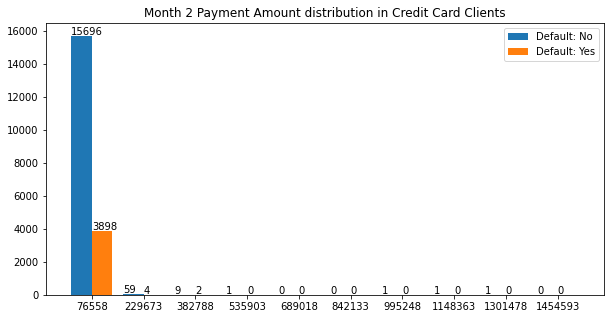

In [ ]:
max_val = read_file['PAY_AMT2'].max()
min_val = read_file['PAY_AMT2'].min()
intervals = ceil((max_val - min_val)/11)
df_count0 = read_file.groupby('PAY_AMT2')['default payment next month'].apply(lambda x: (x==0).sum()).reset_index(name='count')
df_count1 = read_file.groupby('PAY_AMT2')['default payment next month'].apply(lambda x: (x==1).sum()).reset_index(name='count')
df_0 = df_count0.groupby(pd.cut(df_count0['PAY_AMT2'], np.arange(min_val, max_val, intervals))).sum()
df_1 = df_count1.groupby(pd.cut(df_count1['PAY_AMT2'], np.arange(min_val, max_val, intervals))).sum()

new_index = [0,1,2,3,4,5,6,7,8,9]
index_tick = []
for i in range(len(df_0)):
    index_tick.insert(i, ceil(intervals*i + min_val + intervals/2))

width=0.4    
bar_0 = plt.bar([x-width/2 for x in new_index], df_0['count'], width=width, label = 'Default: No')
bar_1 = plt.bar([x+width/2 for x in new_index], df_1['count'],width=width, label = 'Default: Yes')
plt.title('Month 2 Payment Amount distribution in Credit Card Clients')
plt.legend(loc='best')
for i in bar_0:
    H = i.get_height()
    plt.text(i.get_x(), H+50, H)
for i in bar_1:
    H = i.get_height()
    plt.text(i.get_x(), H+50, H)
plt.xticks([0,1,2,3,4,5,6,7,8,9],index_tick)

([<matplotlib.axis.XTick at 0x7fb89c963190>,
 [Text(0, 0, '45910'),
  Text(0, 0, '117729'),
  Text(0, 0, '189548'),
  Text(0, 0, '261367'),
  Text(0, 0, '333186'),
  Text(0, 0, '405005'),
  Text(0, 0, '476824'),
  Text(0, 0, '548643'),
  Text(0, 0, '620462'),
  Text(0, 0, '692281')])

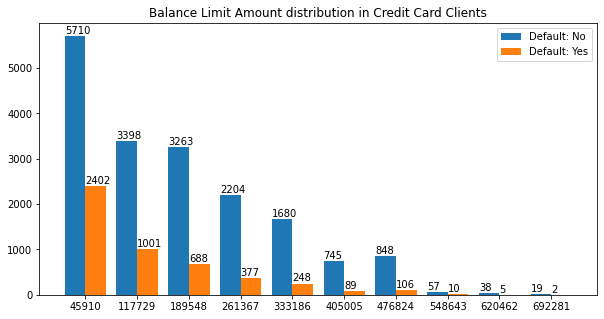

In [ ]:
max_val = read_file['LIMIT_BAL'].max()
min_val = read_file['LIMIT_BAL'].min()
intervals = ceil((max_val - min_val)/11)
df_count0 = read_file.groupby('LIMIT_BAL')['default payment next month'].apply(lambda x: (x==0).sum()).reset_index(name='count')
df_count1 = read_file.groupby('LIMIT_BAL')['default payment next month'].apply(lambda x: (x==1).sum()).reset_index(name='count')
df_0 = df_count0.groupby(pd.cut(df_count0['LIMIT_BAL'], np.arange(min_val, max_val, intervals))).sum()
df_1 = df_count1.groupby(pd.cut(df_count1['LIMIT_BAL'], np.arange(min_val, max_val, intervals))).sum()

new_index = [0,1,2,3,4,5,6,7,8,9]
index_tick = []
for i in range(len(df_0)):
    index_tick.insert(i, ceil(intervals*i + min_val + intervals/2))

width=0.4    
bar_0 = plt.bar([x-width/2 for x in new_index], df_0['count'], width=width, label = 'Default: No')
bar_1 = plt.bar([x+width/2 for x in new_index], df_1['count'],width=width, label = 'Default: Yes')
plt.title('Balance Limit Amount distribution in Credit Card Clients')
plt.legend(loc='best')
for i in bar_0:
    H = i.get_height()
    plt.text(i.get_x(), H+50, H)
for i in bar_1:
    H = i.get_height()
    plt.text(i.get_x(), H+50, H)
plt.xticks([0,1,2,3,4,5,6,7,8,9],index_tick)

The **Distributions** show, that while the marital status(married and single) don't have a lot of difference in terms of numbers, the education data shows mostly people who are highly educated tend more to be credit card clients. The Female clientele is slightly more than the Male. In terms of age, people in their 20s and 30s are more inclined to be a credit card client. 

The Balance limit for most people is on the lower end, with only a handful of people having really high balance limit on their cards. Most of the people do tend to pay off their balances immediately or a month late. Bill amounts are usually in the lower positive area, while some in the negative, which could pertain to some refund or cashback. The payments made are also correspondingly towards the lower end of the spectrum. 

The **Ranked Lists** seen are reasonable. It would make sense that if the client's balance limit is too high, they have more purchasing power, but this would also mean the amount they will have to pay is higher. Also, if a person isn't able to pay their bill, then the bill amount would go piling up. Both these reasons can lead to defaulting the card. So it makes sense that balance limit and Payment amounts are higher in the list. Whatever value the bill is, it's whether the person is paying them or not that will escalate things. 

It also makes sense that the Pay_n amounts are higher on the categorical list. They show whether a person has properly paid the bill amounts(since Pay_n indicates how many months has the bill not been paid). Its a direct correlation and can give us an idea looking at a person's history what they're going to do in the future. 

In both these lists, features like age, gender rank lower. This is because a person's ability to pay a bill doesn't depend on their gender, or marriage status, rather their spending habits, their income, and how responsibly are they paying the bills is what factors in. 





# Task 4: Data Preprocessing

## Task 4(a): Creating new features

In this part, we create new features from the old, already present ones. 

I am creating 3 new features, BILL_TOT, PAY_TOT, and BILL_PAY_DIFF. BILL_TOT is the total amount of all bill amounts for all months for all clients, while PAY_TOT is the total payment made for all months for all clients. BILL_PAY_TOT is the difference between the total bill and total payment made.

I believe these features can be useful, as they can help use visualize the client spendings and payments over long term, and also check how much money do they owe more. It might also give us an insight into how the total past history could be related in a person defaulting or no defaulting.

In [ ]:
#We create 3 new features based on features already present
read_file['BILL_TOT'] = (read_file['BILL_AMT1'] + read_file['BILL_AMT2'] + 
                         read_file['BILL_AMT3'] + read_file['BILL_AMT4'] + 
                         read_file['BILL_AMT5'] + read_file['BILL_AMT6'])
read_file['PAY_TOT'] = (read_file['PAY_AMT1'] + read_file['PAY_AMT2'] + 
                        read_file['PAY_AMT3'] + read_file['PAY_AMT4'] + 
                        read_file['PAY_AMT5'] + read_file['PAY_AMT6'])
read_file['BILL_PAY_TOT'] = read_file['PAY_TOT'] - read_file['BILL_TOT']

#We now need to shift the target column to be after our new features
default = read_file.pop('default payment next month')
read_file.insert(28,'default payment next month', default)

## Task 4(b): Normalizing numerical features

We normalize all numerical features into the range [0,1]. In this code, I have used min-max normalization, which involves bringing the lowest value to 0, and all other values are subtracted by the min value, and then all values are divided by the range, to effectively give us a [0,1] range.

In [ ]:
#Normalizing the numerical features
Numerical = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4',
             'BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4'
             ,'PAY_AMT5','PAY_AMT6','BILL_TOT','PAY_TOT', 'BILL_PAY_TOT']
for i in range(len(Numerical)):
    #min-max normalization 
    read_file[Numerical[i] + '_norm'] = ((read_file[Numerical[i]]-read_file[Numerical[i]].min())/(read_file[Numerical[i]].max()-read_file[Numerical[i]].min()))
    print('Range of', Numerical[i], 'is', min(read_file[Numerical[i]]), 'to', max(read_file[Numerical[i]]))
    print('Range of', Numerical[i] + '_norm', 'is', min(read_file[Numerical[i] + '_norm']), 'to', max(read_file[Numerical[i] + '_norm']),'\n')

Range of LIMIT_BAL is 10000 to 800000
Range of LIMIT_BAL_norm is 0.0 to 1.0 

Range of AGE is 21 to 75
Range of AGE_norm is 0.0 to 1.0 

Range of BILL_AMT1 is -165580 to 746814
Range of BILL_AMT1_norm is 0.0 to 1.0 

Range of BILL_AMT2 is -69777 to 743970
Range of BILL_AMT2_norm is 0.0 to 1.0 

Range of BILL_AMT3 is -157264 to 1664089
Range of BILL_AMT3_norm is 0.0 to 1.0 

Range of BILL_AMT4 is -170000 to 706864
Range of BILL_AMT4_norm is 0.0 to 1.0 

Range of BILL_AMT5 is -81334 to 823540
Range of BILL_AMT5_norm is 0.0 to 1.0 

Range of BILL_AMT6 is -209051 to 699944
Range of BILL_AMT6_norm is 0.0 to 1.0 

Range of PAY_AMT1 is 0 to 873552
Range of PAY_AMT1_norm is 0.0 to 1.0 

Range of PAY_AMT2 is 0 to 1684259
Range of PAY_AMT2_norm is 0.0 to 1.0 

Range of PAY_AMT3 is 0 to 889043
Range of PAY_AMT3_norm is 0.0 to 1.0 

Range of PAY_AMT4 is 0 to 621000
Range of PAY_AMT4_norm is 0.0 to 1.0 

Range of PAY_AMT5 is 0 to 426529
Range of PAY_AMT5_norm is 0.0 to 1.0 

Range of PAY_AMT6 is 0 

## Task 4(c): One-hot Encoding

The categorical labels cannot be input in a Decision tree, hence they need to be encoded in One-Hot Encoding form, that involves representing feature values as either 0 or 1. 

The next two blocks show the code and no. of 1's in each new binary features. 

In [ ]:
one_hot_cols = []

one_hot = pd.get_dummies(read_file['SEX']) #creating one hot representations for all uniques values in a feature vector
read_file['SEX_is_Male'] = one_hot[1]
read_file['SEX_is_Female'] = one_hot[2]
one_hot_cols.append('SEX_is_Male')
one_hot_cols.append('SEX_is_Female')
print('SEX_is_Male: ', read_file['SEX_is_Male'].sum())
print('SEX_is_Female: ', read_file['SEX_is_Female'].sum())
print('\n')

one_hot = pd.get_dummies(read_file['EDUCATION'])
read_file['EDUCATION_is_graduate_school'] = one_hot[1]
read_file['EDUCATION_is_university'] = one_hot[2]
read_file['EDUCATION_is_high_school'] = one_hot[3]
read_file['EDUCATION_is_others'] = one_hot[4]
one_hot_cols.append('EDUCATION_is_graduate_school')
one_hot_cols.append('EDUCATION_is_university')
one_hot_cols.append('EDUCATION_is_high_school')
one_hot_cols.append('EDUCATION_is_others')
print('EDUCATION_is_graduate_school:', read_file['EDUCATION_is_graduate_school'].sum())
print('EDUCATION_is_university: ', read_file['EDUCATION_is_university'].sum())
print('EDUCATION_is_high_school: ', read_file['EDUCATION_is_high_school'].sum())
print('EDUCATION_is_others: ', read_file['EDUCATION_is_others'].sum())
print('\n')

one_hot = pd.get_dummies(read_file['MARRIAGE'])
read_file['MARRIAGE_is_married'] = one_hot[1]
read_file['MARRIAGE_is_single'] = one_hot[2]
read_file['MARRIAGE_is_others'] = one_hot[3]
one_hot_cols.append('MARRIAGE_is_married')
one_hot_cols.append('MARRIAGE_is_single')
one_hot_cols.append('MARRIAGE_is_others')
print('MARRIAGE_is_married: ', read_file['MARRIAGE_is_married'].sum())
print('MARRIAGE_is_single: ', read_file['MARRIAGE_is_single'].sum())
print('MARRIAGE_is_others: ', read_file['MARRIAGE_is_others'].sum())

SEX_is_Male:  9249
SEX_is_Female:  14042


EDUCATION_is_graduate_school: 8089
EDUCATION_is_university:  10994
EDUCATION_is_high_school:  3854
EDUCATION_is_others:  354


MARRIAGE_is_married:  10624
MARRIAGE_is_single:  12417
MARRIAGE_is_others:  250


In [ ]:
pay_list = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
for j in range(len(pay_list)):
    one_hot = pd.get_dummies(read_file[pay_list[j]])
    for i in range(10):
        if i in one_hot.columns: #checking if i is in the feature vector as a unique value
            read_file[pay_list[j] + '_is_'+ str(i)] = one_hot[i]
            one_hot_cols.append(pay_list[j] + '_is_'+ str(i))
            print(pay_list[j] + '_is_'+ str(i), read_file[pay_list[j] + '_is_'+ str(i)].sum())
        else:
            read_file[pay_list[j] + '_is_'+ str(i)] = 0
            one_hot_cols.append(pay_list[j] + '_is_'+ str(i))
            print(pay_list[j] + '_is_'+ str(i), read_file[pay_list[j] + '_is_'+ str(i)].sum())
    print('\n')

PAY_0_is_0 18293
PAY_0_is_1 2482
PAY_0_is_2 2139
PAY_0_is_3 262
PAY_0_is_4 62
PAY_0_is_5 20
PAY_0_is_6 7
PAY_0_is_7 9
PAY_0_is_8 17
PAY_0_is_9 0


PAY_2_is_0 19751
PAY_2_is_1 25
PAY_2_is_2 3135
PAY_2_is_3 261
PAY_2_is_4 70
PAY_2_is_5 18
PAY_2_is_6 12
PAY_2_is_7 18
PAY_2_is_8 1
PAY_2_is_9 0


PAY_3_is_0 19906
PAY_3_is_1 4
PAY_3_is_2 3080
PAY_3_is_3 180
PAY_3_is_4 58
PAY_3_is_5 20
PAY_3_is_6 20
PAY_3_is_7 20
PAY_3_is_8 3
PAY_3_is_9 0


PAY_4_is_0 20480
PAY_4_is_1 2
PAY_4_is_2 2536
PAY_4_is_3 139
PAY_4_is_4 54
PAY_4_is_5 28
PAY_4_is_6 4
PAY_4_is_7 47
PAY_4_is_8 1
PAY_4_is_9 0


PAY_5_is_0 20916
PAY_5_is_1 0
PAY_5_is_2 2112
PAY_5_is_3 129
PAY_5_is_4 70
PAY_5_is_5 14
PAY_5_is_6 3
PAY_5_is_7 46
PAY_5_is_8 1
PAY_5_is_9 0


PAY_6_is_0 20810
PAY_6_is_1 0
PAY_6_is_2 2238
PAY_6_is_3 144
PAY_6_is_4 38
PAY_6_is_5 9
PAY_6_is_6 13
PAY_6_is_7 38
PAY_6_is_8 1
PAY_6_is_9 0




# Task 5: Classification Experiments

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix

## Task 5(a & b): Decision Tree

In this section, we model two decision trees, one with the normalized features and OHE categorical features, and the other with Unnormalized numerical features and OHE categorical features. The following three blocks create respective dataframes, run the decision trees and immediately output the accuracy and the 5-fold cross-validation result.



1.   **Confusion matrix**: Helps in visualization of performance of a model, confusion matrix  takes 'True' and 'False' predictions and actual values, and creates a matrix that shows the True positive, True negative, False positive and False negative representation. For cases with more than binary features, each cell contains how close the predicted value is to the actual value in that cell.
2.   **Precision**: Precision is defined as the number of correct positive identified values among all the positive identified values. The formula therefore is,

  Precision = (True Positives)/(True Positives + False Positives)

3. **Recall**: Recall is the measure of how many Positive value predictions were made out of all that could have been made. That is, it also takes into account False negatives, that should have actually been positive.

  Recall = (True Positives)/(True Positives + False Negatives)

4. **F-measure**: While precision and recall can both be useful, they donot paint a full picture, since they based in two different concepts and set of points. F-measure combines the information into one through the formula,

  F-measure = (2* *Precision* *Recall)/(Precision + Recall)

5. **Accuracy**: Accuracy is one of the most used and famous metrics in machine learning. It is the measure of how many total correct predictions were made. Thus it takes into account all values that our model predicts. In other sense,

  Accuracy = (TP + TN)/(TP + FP + TN + FN)

Please note that the normalization scheme used in min-max normalization.

The result conclusion paragraph is after the two decision trees.

In [ ]:
#Preparing datasets and target vector for decision tree
unnormalized_features = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3',
                         'BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2',
                         'PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
normalized_features = []
for i in range(len(unnormalized_features)):
    normalized_features.append((unnormalized_features[i] + '_norm'))

unnormalizes_list = unnormalized_features + one_hot_cols
normalized_list = normalized_features + one_hot_cols

X_unnorm = read_file[unnormalizes_list] #non-normalized values dataset
X_norm = read_file[normalized_list] #normalized value dataset
Y = read_file['default payment next month'] #Target vector

Results for Normalized features are
Accuracy: 0.8113329040566645
Precision: [0.62236629 0.62857143 0.63937282 0.64478114 0.60394537] Mean Precision: 0.6278074111840697
Recall: [0.37684004 0.38861629 0.36051081 0.3762279  0.39096267] Mean Recall 0.3786315409961228
f_measure: [0.46943765 0.48029109 0.46105528 0.4751861  0.47465713] Mean F-measure 0.4721254489476584
Confusion matrix: [[3390  240]
 [ 639  390]]


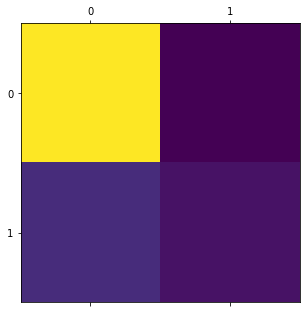

In [ ]:
#Decision Tree 1 with normalized numerical features
X_train, X_test, y_train, y_test = train_test_split(X_norm, Y, test_size=0.2, random_state=100)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(
    criterion='entropy',  
    max_depth=10
)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

scoring = ['precision', 'recall', 'f1']

# Model Accuracy, how often is the classifier correct
print('Results for Normalized features are')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
cv_results = cross_validate(clf, X_norm, Y, cv=5, scoring = ['precision', 'recall', 'f1'])
Precision = cv_results['test_precision']
mean_precision = cv_results['test_precision'].mean()
Recall = cv_results['test_recall']
mean_recall = cv_results['test_recall'].mean()
f_measure = cv_results['test_f1']
mean_f_measure = cv_results['test_f1'].mean()
print('Precision:', Precision,'Mean Precision:', mean_precision)
print('Recall:', Recall, 'Mean Recall', mean_recall)
print('f_measure:', f_measure,'Mean F-measure', mean_f_measure)
print('Confusion matrix:', confusion_matrix(y_test, y_pred))
plt.matshow(confusion_matrix(y_test, y_pred))

Results for Unnormalized features are
Accuracy: 0.810688989053445
Precision: [0.62398703 0.62816456 0.64035088 0.64705882 0.60394537] Mean Precision: 0.6287013326990987
Recall: [0.37782139 0.38959764 0.35854617 0.37819253 0.39096267] Mean Recall 0.37902408270367915
f_measure: [0.47066015 0.48092065 0.45969773 0.47737136 0.47465713] Mean F-measure 0.47266140347684027
Confusion matrix: [[3391  239]
 [ 643  386]]


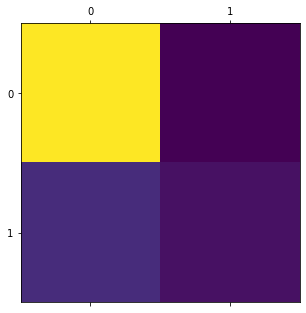

In [ ]:
#Decision Tree 1 with unnormalized numerical features
X_train, X_test, y_train, y_test = train_test_split(X_unnorm, Y, test_size=0.2, random_state=100)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(
    criterion='entropy',  
    max_depth=10
)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

scoring = ['precision', 'recall', 'f1']

# Model Accuracy, how often is the classifier correct?
print('Results for Unnormalized features are')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
cv_results = cross_validate(clf, X_unnorm, Y, cv=5, scoring = ['precision', 'recall', 'f1'])
Precision = cv_results['test_precision']
mean_precision = cv_results['test_precision'].mean()
Recall = cv_results['test_recall']
mean_recall = cv_results['test_recall'].mean()
f_measure = cv_results['test_f1']
mean_f_measure = cv_results['test_f1'].mean()
print('Precision:', Precision,'Mean Precision:', mean_precision)
print('Recall:', Recall, 'Mean Recall', mean_recall)
print('f_measure:', f_measure,'Mean F-measure', mean_f_measure)
print('Confusion matrix:', confusion_matrix(y_test, y_pred))
plt.matshow(confusion_matrix(y_test, y_pred))

## Task 5(a & b) Results
As clear from the Accuracy results, the results are very very close. The accuracy in case of Normalized features is 80.789%, where as for Unnormalized features it is 80.7469%. The same goes for the rest of the metrics.


1.   Mean Precision: 60.92 vs 61.00
2.   Mean Recall: 37.13 vs 36.68
3.   Mean F-measure: 46 vs 45.77

Thus normalization, for depth = 10 has a very small effect for this case of classification. The confusion matrices have also been displayed and plotted. 

In conclusion, The Decision Tree classifier is able to correctly classify the test data values almost 81% of the time. However, normalization doesn't seem to have a major effect at this stage. We could let the tree keep branching until only pure leaves are left. But all the metrics too show that the difference is very slight. Normalization does show relatively stronger effect on recall and f-measure. But it isn't significant enough to clearly choose one over the other. 



# Task 6

## Task 6(a): Why do we perform Feature Selection?

In larger projects and datasets, we may have hundreds if not thousands of features.


1.   Not every features is useful for our classification task. Hence it is useful to just filter through and find most useful features.
2.   Lesser features means less computing for the machine, hence more computing power for the code. Thus, we make performance better and decrease time for training. 
3. Some features may be very noisy or uncorrelated with our data. Ignoring such features can actually help increase the accuracy of our model.



## Task 6(b): Feature Selection

We now perform feature selection on our numerical and categorical features. We have already performed chi square test and mutual information on the features in Task 3. We can now choose top k features from the sorted lists and use them for training decision trees. 

Please note that the partial dataset generation and training and testing on it are all performed in Task 6c.

In [ ]:
#Selecting top features for feature selection
k = [1,3,5]

for i in k:
    print('Top', i, 'features are,')
    k_numeric = result.nlargest(n=i, keep='first')
    print('Numeric:', k_numeric.index)
    k_categorical = chi_score2.nlargest(n=i, keep='first')
    print('Categorical:', k_categorical.index)
    print('\n')

Top 1 features are,
Numeric: Index(['PAY_AMT1'], dtype='object')
Categorical: Index(['PAY_0'], dtype='object')


Top 3 features are,
Numeric: Index(['PAY_AMT1', 'LIMIT_BAL', 'PAY_AMT2'], dtype='object')
Categorical: Index(['PAY_0', 'PAY_2', 'PAY_3'], dtype='object')


Top 5 features are,
Numeric: Index(['PAY_AMT1', 'LIMIT_BAL', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT6'], dtype='object')
Categorical: Index(['PAY_0', 'PAY_2', 'PAY_3', 'PAY_5', 'PAY_4'], dtype='object')




## Task 6(c): Decision Tree in top features

In this final section, we perform decision tree classification on top k features, k taking values from k = [1,3,5]. We create partial datasets based on the selected features and pass them through the Decision Tree Classifier to get all the 5-fold results. 

The summary of the results is mentioned at the end.

In [ ]:
k = [1,3,5]
for i in k:
    idx = [i for i in range(2*i)]
    print('Top', i, 'features are,')
    k_numeric = result.nlargest(n=i, keep='first') #Top k numeric
    print('Numeric:', k_numeric.index)
    k_categorical = chi_score2.nlargest(n=i, keep='first') #Top k categorical
    print('Categorical:', k_categorical.index, '\n')
    unnormalized_features = []
    numeric = pd.DataFrame(k_numeric.index, columns =['features'])
    categoric = pd.DataFrame(k_categorical.index, columns =['features'])
    OHE = pd.DataFrame()
    #Preparing dataset with top K One hot encoded categorical features
    for category in categoric['features']:
        values = read_file[category].unique()
        values = np.sort(values)
        for value in values:
            ohe_data = category + '_is_' + str(value)
            OHE[ohe_data] = np.where(read_file[category]== value,1,0)
    #Preparing dataset with top K norm and non-norm numerical features
    num_features = pd.DataFrame()
    num_norm_features = pd.DataFrame()
    for num in numeric['features']:
        norm_data = num + '_norm'
        num_features[num] = read_file[num]
        num_norm_features[num] = read_file[norm_data]
            
    
    X_unnorm = pd.concat([OHE, num_features], axis = 1)
    X_norm = pd.concat([ OHE, num_norm_features], axis = 1)
    Y = read_file['default payment next month']
    
    print('Results for top', i, 'Normalized features are')
    
    #Decision Tree 1 with normalized numerical features
    X_train, X_test, y_train, y_test = train_test_split(X_norm, Y, test_size=0.2, random_state=100)
    
    # Create Decision Tree classifer object
    clf = DecisionTreeClassifier(
    criterion='entropy',  
    max_depth=10
    )

    # Train Decision Tree Classifer
    clf = clf.fit(X_train,y_train)

    #Predict the response for test dataset
    y_pred = clf.predict(X_test)

    scoring = ['precision', 'recall', 'f1']

    # Model Accuracy, how often is the classifier correct?
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    cv_results = cross_validate(clf, X_norm, Y, cv=5, scoring = ['precision', 'recall', 'f1'])
    Precision = cv_results['test_precision']
    mean_precision = cv_results['test_precision'].mean()
    Recall = cv_results['test_recall']
    mean_recall = cv_results['test_recall'].mean()
    f_measure = cv_results['test_f1']
    mean_f_measure = cv_results['test_f1'].mean()
    print('Precision:', Precision,'Mean Precision:', mean_precision)
    print('Recall:', Recall, 'Mean Recall', mean_recall)
    print('f_measure:', f_measure,'Mean F-measure', mean_f_measure)
    print('Confusion matrix:', confusion_matrix(y_test, y_pred))
    
    print('Results for top', i, 'Unnormalized features are')
    
    #Decision Tree 1 with unnormalized numerical features
    X_train, X_test, y_train, y_test = train_test_split(X_unnorm, Y, test_size=0.2, random_state=100)

    # Create Decision Tree classifer object
    clf = DecisionTreeClassifier(
        criterion='entropy',  
        max_depth=10
    )

    # Train Decision Tree Classifer
    clf = clf.fit(X_train,y_train)

    #Predict the response for test dataset
    y_pred = clf.predict(X_test)

    scoring = ['precision', 'recall', 'f1']

    # Model Accuracy, how often is the classifier correct?
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    cv_results = cross_validate(clf, X_unnorm, Y, cv=5, scoring = ['precision', 'recall', 'f1'])
    Precision = cv_results['test_precision']
    mean_precision = cv_results['test_precision'].mean()
    Recall = cv_results['test_recall']
    mean_recall = cv_results['test_recall'].mean()
    f_measure = cv_results['test_f1']
    mean_f_measure = cv_results['test_f1'].mean()
    print('Precision:', Precision,'Mean Precision:', mean_precision)
    print('Recall:', Recall, 'Mean Recall', mean_recall)
    print('f_measure:', f_measure,'Mean F-measure', mean_f_measure)
    print('Confusion matrix:', confusion_matrix(y_test, y_pred), '\n')

Top 1 features are,
Numeric: Index(['PAY_AMT1'], dtype='object')
Categorical: Index(['PAY_0'], dtype='object') 

Results for top 1 Normalized features are
Accuracy: 0.8190598840952994
Precision: [0.66600398 0.68944099 0.67976424 0.68809074 0.67184466] Mean Precision: 0.6790289221962285
Recall: [0.32875368 0.32679097 0.33988212 0.35756385 0.33988212] Mean Recall 0.33857454918435775
f_measure: [0.44021025 0.44340879 0.45317616 0.47058824 0.45140248] Mean F-measure 0.45175718289151734
Confusion matrix: [[3474  156]
 [ 687  342]]
Results for top 1 Unnormalized features are
Accuracy: 0.8190598840952994
Precision: [0.66600398 0.68944099 0.67976424 0.68809074 0.67184466] Mean Precision: 0.6790289221962285
Recall: [0.32875368 0.32679097 0.33988212 0.35756385 0.33988212] Mean Recall 0.33857454918435775
f_measure: [0.44021025 0.44340879 0.45317616 0.47058824 0.45140248] Mean F-measure 0.45175718289151734
Confusion matrix: [[3474  156]
 [ 687  342]] 

Top 3 features are,
Numeric: Index(['PAY_AMT1

Summary of Results.
The following are the results: 

Metric | K=1(norm) | K=1(unnorm)  | K=3(norm)  | K=3(unnorm) | K=5(norm)  | K=5(unnorm)
-------|------------------|---------------------|------------------|---------------------|------------------|---------------------|
Accuracy | 81.90 | 81.90 | 81.32 | 81.43 | 81.09| 81.11
Mean Precision | 67.90 | 67.90 | 63.21 | 62.99 | 62.88 | 62.94
Mean Recall | 33.85 | 33.85 | 38.23 | 38.17| 38.19| 38.19
Mean F-measure | 45.17| 45.17| 47.58| 47.60 | 47.51 | 47.47

As we can see, for K=1, the values remain exactly the same, meanining for one feature the normalization has no difference. However, as we go on adding more and more features, the difference between normalized and unnormalized values in all four metrics starts to increase. 

The metric values actually show us an interesting trend. The mean recall and mean f-measure is higher for K=3 features. Meaning, in some sense, K=3 might be the most optimal number of features for our dataset. Of course, more options can be explored, but in these 3 values, it would seem K=3 is the most optimal number of features.


